# k-Means Implementation

In [25]:
import numpy as np
import pandas as pd
import time 

class kMeans:
    
    def __init__(self, data, k, tolerance = 1e-4, max_iters=100):
        self.k = k
        self.data = data
        self.tolerance = tolerance
        self.max_iters = max_iters
        
    def run(self):
        
        # Step 1: Initialize cluster centers
        N = len(self.data)
        self.centroids = [self.data[i] for i in np.random.choice(N, self.k, replace = False)]
            
        # Step 2: Enter repeat loop
        for iteration in range(self.max_iters):
            
            clusters = [[] for _ in range(self.k)]
            
            # Step 3: Assign points to clusters based off of distance to centroid
            for point in self.data:
                
                distances = [np.linalg.norm(np.array(point) - np.array(centroid)) for centroid in self.centroids]
                closest_cluster = np.argmin(distances)
                clusters[closest_cluster].append(point)
                
            # Step 4: Update the centroids, based on the newly assigned points
            new_centroids = []
            for cluster in clusters:
                
                updated_centroid = np.mean(cluster, axis = 0)
                new_centroids.append(updated_centroid)
                
                
            # Step 5: check for convergence
            difference = np.linalg.norm(np.array(self.centroids) - np.array(new_centroids))

            if(difference < self.tolerance):
                print(f'Algorithm converged after {iteration + 1} iterations')
                return clusters
            
            self.centroids = new_centroids
            
        print('Algorithm did not converge to a minimum.')
        

# Plotting Cluster

## Plotting Clustering from cluster_data.txt
## Measuring Time and Comparing to MBSAS

In [2]:
# importing the data

file = '/Users/daviddechantsreiter/Desktop/WPI/Courses/Intro to AI/HW3/cluster_data.txt'
data = pd.read_csv(file, delim_whitespace=True, header=None, usecols=[1,2])

data.columns = ['Width', 'Length']
data
cluster_data = data[['Width', 'Length']].values.tolist()

Algorithm converged after 7 iterations


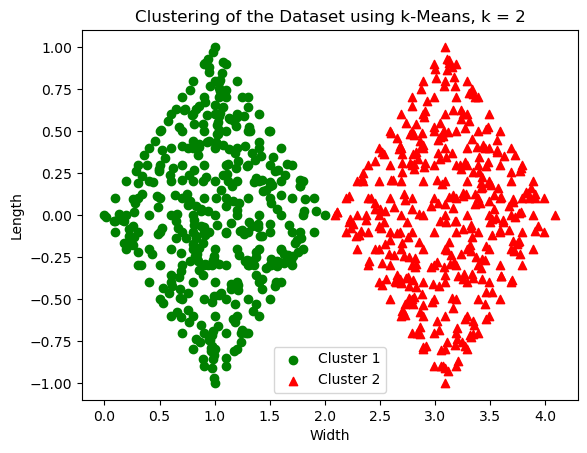

In [3]:
import matplotlib.pyplot as plt
K_means = kMeans(cluster_data, k=2)

Clusters = K_means.run()

colors = ['g', 'r']
markers = ['o', '^']

for i, cluster in enumerate(Clusters):
    x, y = zip(*cluster)
    plt.scatter(x, y, c=colors[i], marker=markers[i], label=f'Cluster {i+1}')

plt.title('Clustering of the Dataset using k-Means, k = 2')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

In [4]:
# measuring time for the algorithm to run
start_time = time.time()

K_means = kMeans(cluster_data, k=2)

Clusters = K_means.run()

end_time = time.time()
print(f"Time taken: {end_time - start_time:.5f} seconds")

Algorithm converged after 5 iterations
Time taken: 0.08021 seconds


### k-Means: $0.08021$ Seconds
### MBSAS  : $0.26458$ Seconds

Based on the results from the time recorded for each algorithm we can see that the k-Means algorithm outperformed the MBSAS algorithm. This is most likely due to the simplicity of determining the distance between a point and a cluster in the k-Means algorithm. 

In the MBSAS algorithm, we have to iterate over all the vectors in each of the clusters to determine which cluster has the minimal distance to the input vector. We do this because that is how we define the distance from a point to a cluster. 

However in the k-Means algorithm all we have to do to determine which cluster to add the current point to, is to determine which centroid the point is closer to. This is much more efficient since we no longer have to iterate over all elements of all clusters, but rather just do $m$ comparisons for each point.

# 2c - Forcing k-Means to Create More Clusters than Expected

Algorithm converged after 12 iterations
Amount of Clusters:  3


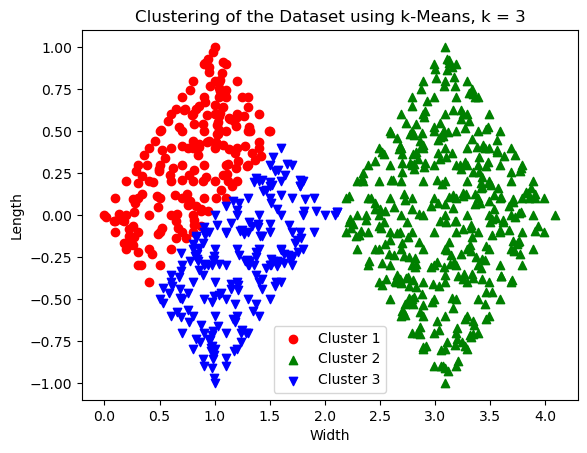

In [33]:
K_means = kMeans(cluster_data, k=3)

Clusters = K_means.run()
print('Amount of Clusters: ', len(Clusters))
#generated using ChatGPT
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'w', 'orange', 'purple', 'pink', 'brown', 'teal', 'navy', 'lime']
markers = ['o', '^', 'v', '<', '>', 's', 'p', '*', 'H', 'h', '+', 'x', 'D', 'd', '|', '_']
#

for i, cluster in enumerate(Clusters):
    x, y = zip(*cluster)
    plt.scatter(x, y, c=colors[i], marker=markers[i], label=f'Cluster {i+1}')

plt.title('Clustering of the Dataset using k-Means, k = 3')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

Algorithm converged after 41 iterations
Amount of Clusters:  7


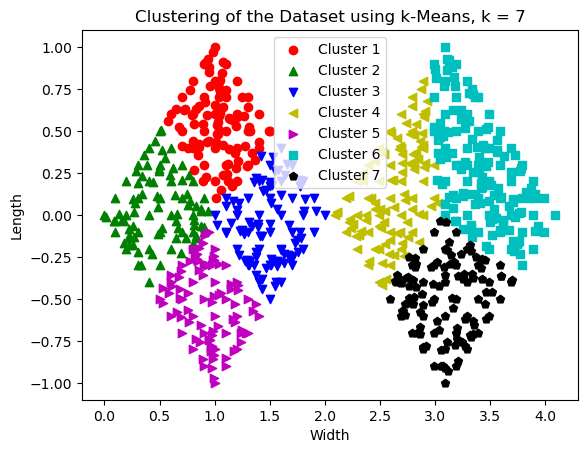

In [35]:
K_means = kMeans(cluster_data, k=7)

Clusters = K_means.run()
print('Amount of Clusters: ', len(Clusters))
#generated using ChatGPT
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k', 'w', 'orange', 'purple', 'pink', 'brown', 'teal', 'navy', 'lime']
markers = ['o', '^', 'v', '<', '>', 's', 'p', '*', 'H', 'h', '+', 'x', 'D', 'd', '|', '_']
#

for i, cluster in enumerate(Clusters):
    x, y = zip(*cluster)
    plt.scatter(x, y, c=colors[i], marker=markers[i], label=f'Cluster {i+1}')

plt.title('Clustering of the Dataset using k-Means, k = 7')
plt.xlabel('Width')
plt.ylabel('Length')
plt.legend()
plt.show()

### As expected we see that the algorithm attempts to create much more clusters than are actually inherent to the dataset. However, we also see the k-Means algorithm's tendency to create balanced cluster assignments. The dataset plots as two diamonds and for higher k values we can see that the algorithm creates equidistant clusters. This is primarily supported by the algorithm producing clusters of similar sizes and splitting each diamond into roughly equal shapes. Especially for $m_\theta = 7$ we can see the first diamond being split up into smaller diamonds. The center of each diamond also serves as a meeting point for most clusters. Finally, another thing we can observe is that the algorithm takes a lot more iterations to converge.